## Means Testing

#### A Note on the Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, then the distribution of the sample means will be approximately normally distributed

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [ ]:
# simulate rolling a virtual die

### Distribution of sample means 
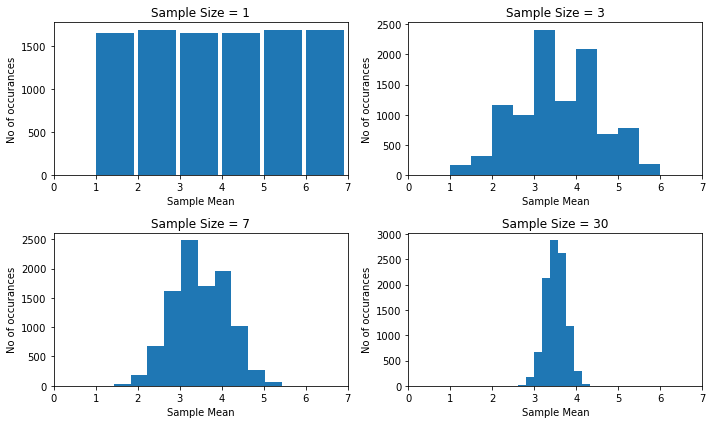

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

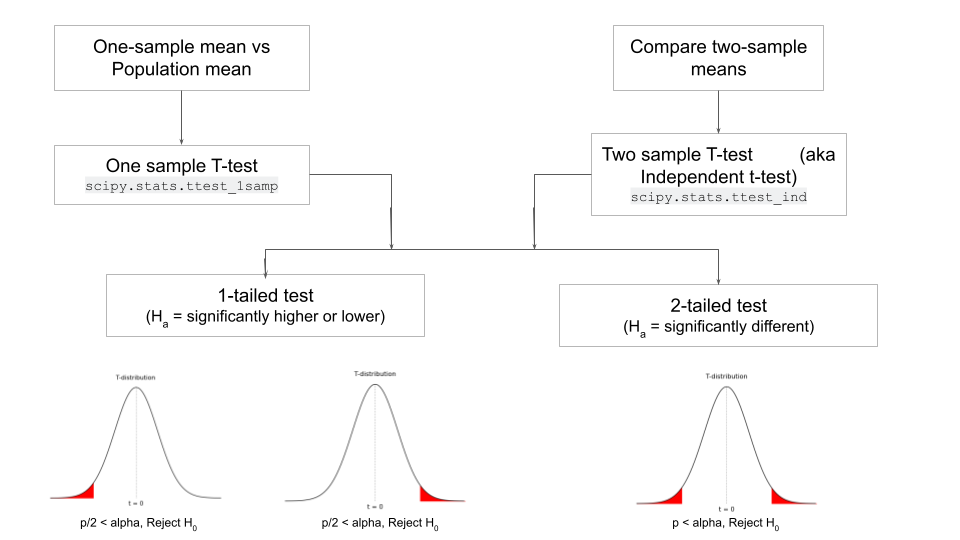

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

### Let's pull in mpg, a data set that we are somewhat familiar with

In [2]:
mpg = data('mpg')

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Off-hand Notes:
 - automatic transmission vehicles may have different highway mileage than manual transmission vehicles
 - older cars have lower cty fuel efficiency than newer cars
 - the displacement of older cars is different from all cars

 - the displacement of older cars is different from all cars

In [7]:
# what determines an older car?

In [8]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [9]:
# It appears in this case that 1999 cars are our best definition of "older"
# we will continue forward with this distinction

### H$_0$ 
 - That the mean displacement of vehicles from 1999 is no different from all vehicles

### H$_a$
 - The mean displacement of vehicles from 1999 is different from the mean of all vehicles in our data

Determining our test:
    - We are comparing 1999 vehicles to *all* vehicles
    
        - This means that we want to perform a 1-sample test
        
    - We are comparing the means of 1999 vehicles to all vehicles
    by way of sheer difference, we have a two-tailed test

In [15]:
# mpg.displ

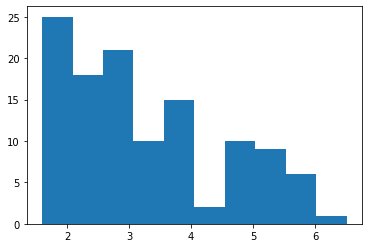

In [18]:
plt.hist(mpg[mpg.year == 1999].displ)
plt.show()

In [19]:
# this does look significantly tailed, 
# due to the Central Limit Theorem and the idea that this is likely skewed for a
# multitude
# of reasons, I'm still currently going to stick with a t-test
# we will get pickier about this later down the line
# as we discuss appropriate data preprocessing

In [20]:
μth = mpg.displ.mean()

In [21]:
μth

3.4717948717948697

In [22]:
# confidence level = 0.95
α = 0.05

In [24]:
displ_old = mpg[mpg.year == 1999].displ

In [25]:
# actually doing the t-test:
# arguments:
# first: the sample of mpg where the mpg year 
# is equal to 1999 (displacement specifically)
stats.ttest_1samp(displ_old, μth)

Ttest_1sampResult(statistic=-1.6361431738775498, pvalue=0.10452008593170266)

In [26]:
# questions for a two-tailed, one sampled test:
# because its two-tailed, p < α

In [29]:
t_stat, p_val = stats.ttest_1samp(displ_old, μth)

In [30]:
p_val

0.10452008593170266

In [31]:
p_val < α

False

- older cars have lower cty fuel efficiency than newer cars

In [32]:
# First steps:
# Set up our hypothesis!!
# set a CL and alpha
# determine if this is one sample or two sample
# determine if this is one tailed or two tailed

H$_0$ : 1999 vehicles have and average city mileage that is greater than or the same as 2008 vehicles

H$_a$ : My 1999 vehicles have a mean city mileage that is lower than the mean city milelage of 2008 vehicles

In [34]:
# sample: 2008 cars vs 1999 cars
# two sample: independent t-test
# tailedness: 1999 vehicles have a cty metric that is 
# LOWER than 2008 vehicles
# one tailed!: we have a sense of directionality
# when we make this assessment, p/2 < α
# aaaaaaaaaand t stat needs to be negative

In [35]:
# check out our spread of information

In [36]:
# make two  variables here for our two values
cty_1999 = mpg[mpg.year == 1999].cty
cty_2008 = mpg[mpg.year != 1999].cty

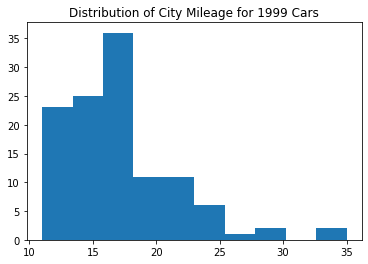

In [38]:
plt.hist(cty_1999)
plt.title('Distribution of City Mileage for 1999 Cars')
plt.show()

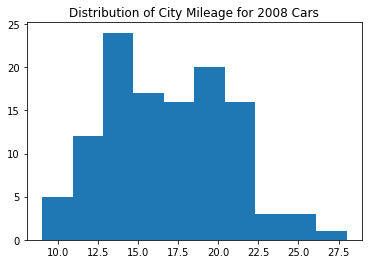

In [39]:
plt.hist(cty_2008)
plt.title('Distribution of City Mileage for 2008 Cars')
plt.show()


based on what we have here, CLT is still doing some lifting for us, howerver, we see that 2008 cars seem to have a more normal distribution off the cuff, which could tell us something about the way that sampling was taken on 1999 vehicles, or that 1999 vehicles have some outiers that may or may not need addressing in our data preparation stage (more to come on this!)

In [40]:
# let's check the other parameter of variance here:
# how do that?

H$_0$ : 1999 cars have equal variance in city mileage to 2008 cars

H$_a$ : 1999 cars have different variance in city mileage to 2008 cars

 - sub-alpha: 0.05
 - we'll run a levene test to check the variance between the two
 - if p < alpha, we will reject the null and say these groups have inequal variance

In [ ]:
stats.levene(cty_1999, cty_2008)

LeveneResult(statistic=0.030273333475361427, pvalue=0.8620232104333374)

In [45]:
# p value is real high! 0.86 is bigger than 0.05 by a bit!!
# I cannot reject the null hypothesis here!

In [50]:
stats.ttest_ind(cty_1999,
                cty_2008,
                equal_var=True)

Ttest_indResult(statistic=0.5674988409997608, pvalue=0.5709240495406107)

In [46]:
# be mindful when you feed in arguments to ttest_ind
# when you have a one-tailed test!
t_stat, p_val = stats.ttest_ind(cty_1999,
                                cty_2008,
                                equal_var=True)

In [47]:
t_stat

0.5674988409997608

In [48]:
p_val

0.5709240495406107

In [49]:
(p_val / 2) < α

False

Once again, I cannot reject my null hypothesis. Both because p/2 is not less than alpha, and because my t statistic is not less than 0

In [ ]:
# the test we want to use, is t_testind from stats

- automatic transmission vehicles may have different highway mileage than manual transmission vehicles

In [51]:
# my groups for testing:
# automatic transmission vehicles
# manual transmission vehicles:

# one sample or two sample?

In [52]:
# Two sample, becasue automatic and manual vehicles
# are both explicit subcategories of vehicles

In [53]:
# they have highway mileage that is different
# one tailed or two tailed:
# two tailed, because we are not imbuing directionality to
# our difference

In [54]:
# two sample, two tails

In [55]:
# ttest_ind

In [56]:
# parameter check:

In [57]:
# Normal(ish)?
# variance equal? (levene)
# independent?

In [58]:
# there are no cars that are both manual and automatic, so we
# can say that they are exclusive/independent

In [59]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [62]:
# using a string method for starting with auto, I can make a mask
# to determine an encoded column that states if a vehicle
# is automatic or not automatic(manual)
mpg['auto_transmission'] = mpg.trans.str.startswith('auto')

In [63]:
# my two groups of comparison:
# highway mileage of auto transmission vehicles
# highway mileage of manual transmission vehicles (!auto)

In [64]:
# use masking to determine our two sample groups"
auto_hwy = mpg[mpg['auto_transmission'] == True].hwy
# mpg, where mpg auto transmission is *not* true, specifcally 
# highway mileage values
manual_hwy = mpg[mpg.auto_transmission == False].hwy

In [68]:
# sanity check: does the auto transmission check that I
# established actually narrow down the categories that I want?
mpg[mpg.auto_transmission == True].trans.value_counts()

auto(l4)    83
auto(l5)    39
auto(s6)    16
auto(l6)     6
auto(av)     5
auto(s4)     3
auto(s5)     3
auto(l3)     2
Name: trans, dtype: int64

In [69]:
# manual_hwy

H$_0$:There is no difference in the mean highway mileage between automatic and manual vehicles

H$_a$: There is a difference in mean highway mileage between automatic and manual vehicles

In [70]:
# independence check: passed
# variance check: let's see!

In [73]:
# do a levene test to get the variance!
# arugment order does not matter as much here because we
# are just checking for a difference in variance, not a directional 
# difference in variance
# H0: varaince is equal in auto and manual highway mileage
# Ha: variance is inequal in auto and manual highway mileage
# CL: .95, alpha: 0.05
α = 0.05
_, levene_p = stats.levene(auto_hwy, manual_hwy)

In [74]:
levene_p < α

False

In [75]:
# we cannot reject the null hypothesis, we will presume
# equivalent varaince here

In [76]:
# we have over 30 samples for each, we can rely on clt
auto_hwy.size, manual_hwy.size

(157, 77)

Text(0.5, 1.0, 'Distribution of Automatic Vehicle Highway Mileage')

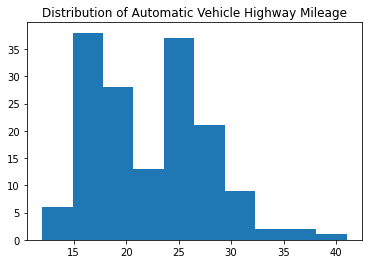

In [77]:
# normality check:
plt.hist(auto_hwy)
plt.title('Distribution of Automatic Vehicle Highway Mileage')

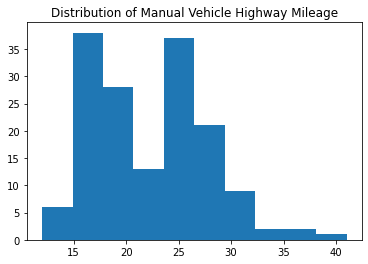

In [78]:
plt.hist(auto_hwy)
plt.title('Distribution of Manual Vehicle Highway Mileage')
plt.show()

In [79]:
# let's do the actual test!

In [80]:
t_stat, p_val = stats.ttest_ind(manual_hwy,
                                auto_hwy,
                                equal_var=True)

In [81]:
# same alpha as previously: 0.05

In [82]:
α

0.05

In [84]:
p_val < α

True

Our p value is less than alpha! This means that we can reject the null hypothesis and suggest that there is some measurable difference in the average highway mileage of automatic vehicles
compared to manual vehicles

In [85]:
p_val

1.888044765552951e-05

In [86]:
t_stat

4.368349972819688

In [96]:
# Let's reconstruct this:
# H0:Manual vehicle highway mileage is less than or equal to 
# automatic vehicle highway mileage
# Ha: Manual vehicle highway mileage on average is greater than 
# automatic vehicles average mileage
# two samples:
# manual cars, automatic cars
# one tail: manual vehicles have *higher* average highway mileage
t_stat, p_val = stats.ttest_ind(manual_hwy,
                                auto_hwy,
                                equal_var=True)

In [97]:
# For a two sample, one-tailed test,
# With this specific order of comparison, 
# I need both of these to be true
# in order to reject the null hypothesis
((p_val / 2) < α) and (t_stat > 0)

True

In [ ]:
# They are both true!!
# This means I can reject the null hypothesis
# which is a little stronger of a statement than I had the first time
# around, because I'm suggesting a directional difference
# in the means (hwy milage of manual vehicles is greater)